# Read in data

In [1]:
import pandas as pd

In [14]:
dataset_url = 'https://raw.githubusercontent.com/RupakRox7366/Drug-Database/refs/heads/main/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'
dataset = pd.read_csv(dataset_url)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.612610
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.595166
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.419075
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.460924


In [12]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
Y = dataset.iloc[:,-1]
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
4690    5.612610
4691    5.595166
4692    5.419075
4693    5.460924
4694    5.555955
Name: pIC50, Length: 4695, dtype: float64

# Remove low variance features

In [15]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP37,PubchemFP143,...,PubchemFP758,PubchemFP761,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,0,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0
4691,1,1,0,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0
4692,1,1,0,1,0,1,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0
4693,1,1,0,1,0,1,1,1,0,0,...,0,0,0,1,1,0,0,1,0,0


In [16]:
X.to_csv('descriptor_list.csv', index = False)

In [17]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
Xlist = list(pd.read_csv('descriptor_list.csv').columns)
X[Xlist]

,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP37,PubchemFP143,...,PubchemFP758,PubchemFP761,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,0,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0
4691,1,1,0,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0
4692,1,1,0,1,0,1,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0
4693,1,1,0,1,0,1,1,1,0,0,...,0,0,0,1,1,0,0,1,0,0


# Model Training and Evaluation

Training Models:  50%|█████     | 4/8 [01:30<01:09, 17.30s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 436
[LightGBM] [Info] Number of data points in the train set: 4695, number of used features: 218
[LightGBM] [Info] Start training from score 5.820864


Training Models: 100%|██████████| 8/8 [01:41<00:00, 12.67s/it]



Model Performance Metrics:
                   R2 Score       MSE      RMSE       MAE
Random Forest      0.860601  0.336052  0.579700  0.362221
Extra Trees        0.896079  0.250525  0.500524  0.207000
Gradient Boosting  0.651989  0.838954  0.915944  0.667235
XGBoost            0.892967  0.258026  0.507962  0.244991
LightGBM           0.821613  0.430039  0.655774  0.430804
AdaBoost           0.208140  1.908948  1.381647  1.130948
SVR                0.591447  0.984905  0.992424  0.651760
KNN                0.672873  0.788610  0.888037  0.613288


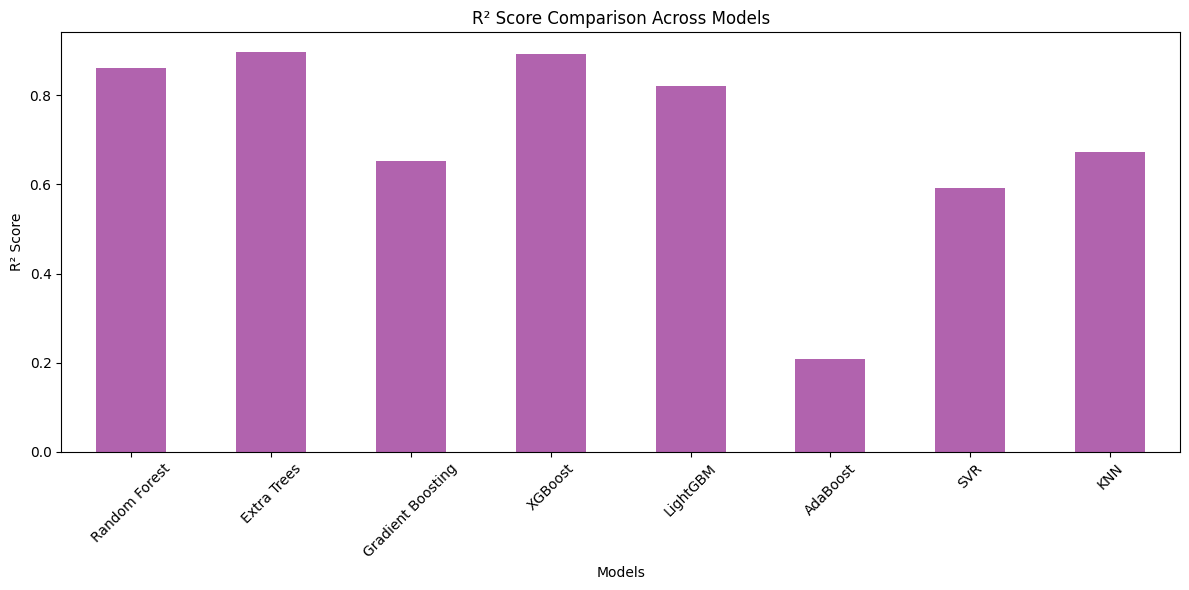

In [18]:
import matplotlib.pyplot as plt
# Import required libraries
from sklearn.ensemble import (RandomForestRegressor, ExtraTreesRegressor, 
                            GradientBoostingRegressor, AdaBoostRegressor)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tqdm import tqdm
import numpy as np

# Dictionary of models to evaluate
models = {
    'Random Forest': RandomForestRegressor(n_estimators=500, random_state=42),
    'Extra Trees': ExtraTreesRegressor(n_estimators=500, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=500, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=500, random_state=42),
    'LightGBM': lgb.LGBMRegressor(n_estimators=500, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=500, random_state=42),
    'SVR': SVR(kernel='rbf'),
    'KNN': KNeighborsRegressor(n_neighbors=5),
}

# Results dictionary
results = {}

# Evaluate each model
for name, model in tqdm(models.items(), desc="Training Models"):
    # Fit model
    model.fit(X, Y)
    
    # Make predictions
    Y_pred = model.predict(X)
    
    # Calculate metrics
    results[name] = {
        'R2 Score': r2_score(Y, Y_pred),
        'MSE': mean_squared_error(Y, Y_pred),
        'RMSE': np.sqrt(mean_squared_error(Y, Y_pred)),
        'MAE': mean_absolute_error(Y, Y_pred)
    }

# Display results as a DataFrame
results_df = pd.DataFrame(results).T
print("\nModel Performance Metrics:")
print(results_df)

# Plot performance comparison
plt.figure(figsize=(12, 6))
results_df['R2 Score'].plot(kind='bar', color='#b163ae')
plt.title('R² Score Comparison Across Models')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Model Prediction

In [19]:
# Use XGBoost model for predictions
xgb_model = models['XGBoost']
Y_pred = xgb_model.predict(X)
Y_pred

array([6.04504  , 7.0106726, 4.488664 , ..., 5.7861714, 5.511808 ,
       5.6432633], shape=(4695,), dtype=float32)

# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [20]:
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

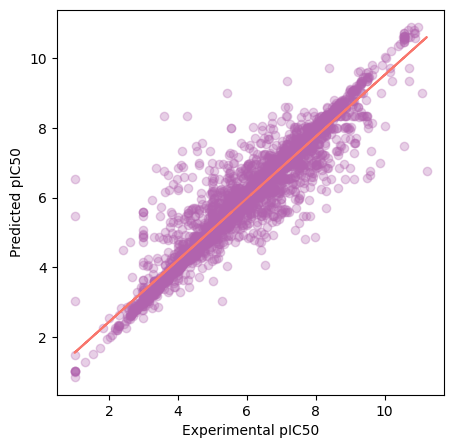

In [22]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#b163ae", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [23]:
import pickle

In [24]:
pickle.dump(xgb_model, open('acetylcholinesterase_model.pkl', 'wb'))